In [74]:
import imageio
import numpy as np
import math
from matplotlib import pyplot as plt

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 404A-07E2

 Directory of C:\Users\Admin\OneDrive\Documents\Code\ComputationalBiophysics

09/06/2018  09:07 AM    <DIR>          .
09/06/2018  09:07 AM    <DIR>          ..
09/04/2018  10:45 PM    <DIR>          .git
09/06/2018  09:06 AM    <DIR>          .ipynb_checkpoints
02/22/2018  02:58 PM               299 3dplot.py
04/06/2018  03:59 PM             2,609 cylinder_plot.m
09/03/2018  11:15 PM        79,385,428 cylinder_plot_with_Initial.gif
06/13/2018  08:46 PM         3,078,312 depolymerization_statistics.txt
09/01/2018  10:33 AM         1,692,667 diffusion_statistics.ipynb
08/18/2018  08:01 AM         9,867,943 diffusion_statistics.txt
04/06/2018  03:59 PM             3,876 fancy_plot.m
04/06/2018  03:59 PM                71 Feb
04/06/2018  03:59 PM               466 Filter.m
03/11/2018  01:21 PM         1,798,037 fragmentation_statistics.txt
04/06/2018  03:59 PM            26,872 ftsZ.jpg
09/06/2018  09:07 AM        64,327

In [13]:
big_table={}
filename='FtsZ_locations.txt'
file=open(filename,'r')
data=file.readline()
while data:
    datas=data.split()
    for index in range(0,len(datas),3):
        key=datas[index]
        if key in big_table:
            big_table[key].append((datas[index+1],datas[index+2]))
        else:
            big_table[key]=[]
            big_table[key].append((datas[index+1],datas[index+2]))
    data=file.readline()
file.close()

In [14]:
big_table.keys()

dict_keys(['25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', 

In [15]:
table_length={}
for key in list(big_table.keys()):
    table_length[key]=len(big_table[key])

In [20]:
sorted_table_ID=list(sorted(table_length,reverse=True,key=table_length.__getitem__))

In [25]:
FtsZ_location=[]
for ID in sorted_table_ID[0:24]:
    print(table_length[ID])
    FtsZ_location.append(big_table[ID])

6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403
6403


In [37]:

for index,FtsZ in enumerate(FtsZ_location):
    image=np.ones((600,563))
    for location in FtsZ:
        image[int(location[0])][int(location[1])]=0
    imageio.imwrite('test'+str(index)+'.jpg',image)

In [86]:
distances=[0]*64
for i in range(1,64):
    distance_sum=0
    counter=0
    for j in range(0,64,i):
              
        
        for FtsZ in FtsZ_location:
            if j*100+i*100<6403:
                initial=FtsZ[j*100]
                final=FtsZ[j*100+i*100]
                distance=np.sqrt(((int(final[0])-int(initial[0]))**2+(int(final[1])-int(initial[1]))**2))
                distance_sum+=distance
                counter+=1
    distances[i]=(distance_sum/counter)
distances=np.array(distances,dtype='float')


In [77]:
from numpy.polynomial.polynomial import polyfit

Text(0,0.5,'Mean Square Displacement unit nm')

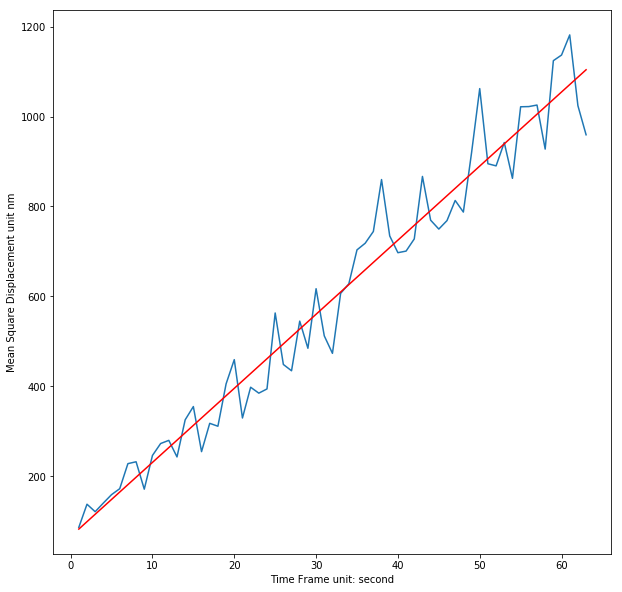

In [87]:
plt.figure(figsize=[10,10])
plt.plot(range(1,64),distances[1:]*5)
b, m = polyfit(range(1,64),distances[1:]*5, 1)
plt.plot(range(1,64), b + m * np.floor(range(1,64)), '-',color='red')
plt.xlabel('Time Frame unit: second')
plt.ylabel('Mean Square Displacement unit nm')

In [89]:
m*10**(-9)

1.647015218890158e-08

In [61]:
velocity=velocity/64.03

In [63]:
velocity=velocity*5*10**(-9)

In [67]:
velocity

array([7.89658649e-09, 7.89658649e-09, 1.99920020e-08, 1.28074492e-08,
       1.28074492e-08, 1.28074492e-08, 1.09368367e-08, 1.38236313e-08,
       1.28848220e-08, 1.31971700e-08, 1.28848220e-08, 1.28848220e-08,
       1.22601269e-08, 1.49167233e-08, 1.61015546e-08, 1.61015546e-08,
       1.48376172e-08, 1.48376172e-08, 1.46033652e-08, 1.47589134e-08,
       1.47336891e-08, 1.47336891e-08, 1.47336891e-08, 3.99840040e-08])